Problem 4

(a)

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import emcee
import corner
import pdb

In [11]:
def make_lognorm(m_min, m_max, N):
    """
    generate fake data that follows the log normal distribution as showed in Equ(3)"""
    mu = 0.08
    sig = 0.69
    c = 0.15*np.sqrt(2*np.pi)*sig
    data = []
    while len(data)<N:
        m = np.random.lognormal(mu, sig)*c
        #pdb.set_trace()
        if (m>m_min) & (m<m_max):
            data.append(m)
    return np.array(data)

(array([ 1673.,  1515.,  1289.,  1132.,   976.,   824.,   799.,   664.,
          601.,   527.]),
 array([ 0.50000371,  0.52999752,  0.55999133,  0.58998514,  0.61997895,
         0.64997277,  0.67996658,  0.70996039,  0.7399542 ,  0.76994801,
         0.79994182]),
 <a list of 10 Patch objects>)

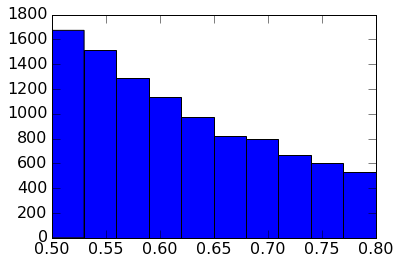

In [12]:
data = make_lognorm(0.5, 0.8, 10000)
plt.clf()
plt.hist(data)

(b)

In [13]:
def ln_prior(theta):
    """
    assume a flat posterior"""
    m_min = 0.5
    m_max = theta[0]
    alpha = theta[1]
    if (m_max>50) or (alpha>10) or (alpha<0):
        return -1000
    else:
        return 0

def pl(m, m_min, m_max, alpha):
    """
    return the power law given m."""
    #pdb.set_trace()
    if alpha == 1:
        pl_m = (m*np.log(m_max/m_min))**(-1)
    else:
        pl_m = (1-alpha)*(m**(-alpha))/(m_max**(1-alpha) - m_min**(1-alpha))
    idx = np.where((m<m_min)|(m>m_max))[0]
    pl_m[idx] = 1e-9
    return pl_m

def ln_likelyhood(theta, data):
    """
    curving fitting on a histogram of the given data"""
    m_min = 0.5
    m_max = theta[0]
    alpha = theta[1]
    pl_m = pl(data, m_min, m_max, alpha)
    #pdb.set_trace()
    return np.sum(np.log(pl_m))

def ln_posterior(theta, data):
    return ln_prior(theta) + ln_likelyhood(theta, data)

# use emcee to infer alpha
def find_theta(data, theta0=[1, 2], plot_result=True):
    steps = 500
    nwalkers = 50
    ndim = 2
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=[data])
    pos = [np.random.normal((theta0)) for i in range(nwalkers)]
    sampler.run_mcmc(pos, steps)
    theta = sampler.chain.reshape((-1, ndim))

    # plot the best fitting result
    if plot_result == True:
        plt.clf()
        corner.corner(theta, labels=['m_max','alpha'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        alpha_best = np.median(theta[:,1])
        alpha_std = np.std(theta[:,1])
        print('the best fit value to alpha is (%.2f +/- %.2f)' %(alpha_best, alpha_std))
        print('the Kroupa 2001 alpha is (%.2f +/- %.2f)' %(2.3, 0.3))
    return 

/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


the best fit value to alpha is (2.75 +/- 1.37)
the Kroupa 2001 alpha is (2.30 +/- 0.30)


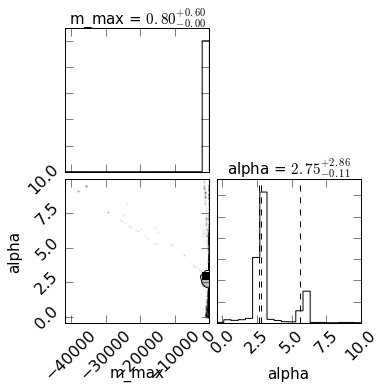

In [14]:
find_theta(data)
